# Flight Delays
## Due Tuesday, May 3 (8AM)

In this lab, we will explore a big data set (2.2 GB) consisting of all flights in the United States between 2005-8. This data is stored in a SQLite database on the server. The path to the file is `/data/flights.db`. The data about the flights is contained in a table called `ontime`. A description of the columns in the data set can be found in `/data/flights.README`.

Furthermore, there is a table called `planes` in the same database containing information about the planes, such as their age. Description of the columns in these two tables can be found [here](http://www.faa.gov/licenses_certificates/aircraft_certification/aircraft_registry/media/ardata.pdf).

Start this assignment early, as each SQL query can take a few minutes to run (and you may need to try a question several times to get the right answer).

NOTES: recommend breaking code into different cells for computation times. Put sql query into one cell.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Question 0 (5 points)

In the cell below, use SQLAlchemy to create a connection to the database. Store the connection in a variable `conn`.

In [2]:
# YOUR CODE HERE
from sqlalchemy import create_engine
conn = create_engine("sqlite:////data/flights.db")

In [3]:
# If your code above was correct, the tests below should pass.

num_flights = pd.read_sql("SELECT COUNT(*) FROM ontime", conn)
assert(num_flights.ix[0, 0] == 28745461)

num_planes = pd.read_sql("SELECT COUNT(*) FROM planes", conn)
assert(num_planes.ix[0, 0] == 317017)

In [4]:
#do this so I can get idea of how  the data looks like
all_ontime_data =  pd.read_sql("SELECT * FROM ontime LIMIT 10000", conn)

first_9_cols = all_ontime_data.ix[:, 'Year':'UniqueCarrier']
print(first_9_cols)
show_invis_cols = all_ontime_data.ix[:, 'FlightNum':'TaxiIn']
print(show_invis_cols)
last_few_cols = all_ontime_data.ix[:, 'TaxiOut':'LateAircraftDelay']
print(last_few_cols)


      Year  Month  DayofMonth  DayOfWeek DepTime  CRSDepTime ArrTime  \
0     2008      1           3          4    2003        1955    2211   
1     2008      1           3          4     754         735    1002   
2     2008      1           3          4     628         620     804   
3     2008      1           3          4     926         930    1054   
4     2008      1           3          4    1829        1755    1959   
5     2008      1           3          4    1940        1915    2121   
6     2008      1           3          4    1937        1830    2037   
...    ...    ...         ...        ...     ...         ...     ...   
9993  2008      1           6          7    1220        1150    1649   
9994  2008      1           6          7     900         905    1009   
9995  2008      1           6          7    2000        1955    2121   
9996  2008      1           6          7    1624        1620    1742   
9997  2008      1           6          7    1946        1805    

## Question 1 (10 points)

Calculate the total number of flights in each year (2004-2008), and make a line plot showing this data. Do you notice any trends?

In [5]:
query1 = """
SELECT Year, COUNT(FlightNum) 
FROM ontime 
GROUP BY Year


"""

num_flights_04to08 = pd.read_sql(query1, conn)

In [6]:
query1

'\nSELECT Year, COUNT(FlightNum) \nFROM ontime \nGROUP BY Year\n\n\n'

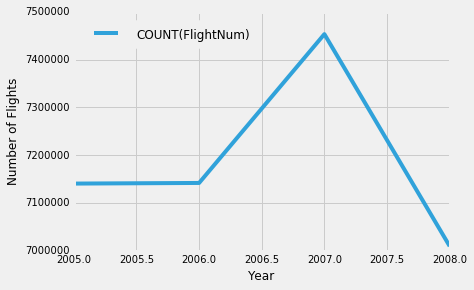

In [7]:
#year_data = pd.read_sql("SELECT Year FROM ontime GROUP BY Year LIMIT 5", conn) #not necessary


with plt.style.context("fivethirtyeight"):
    num_flights_04to08.set_index('Year').plot.line() #!!!!
    plt.ylabel("Number of Flights")
    ax = plt.gca() #get axis
    ax.get_xaxis().get_major_formatter().set_useOffset(False) #remove offset (was in sci notation)

The number of flights peaked in the year 2007, but the number of flights dropped considerably after that.

## Question 2 (10 points)

What time of day is best to fly if you want to avoid delays? Calculate the average delay by _scheduled_ departure time. What do you notice?

In [8]:
#Tip: plot avg delay by scheduled depart time.

query2 = '''

SELECT CRSDepTime, AVG(DepDelay)
FROM ontime
GROUP BY CRSDepTime

'''

avg_delay_by_sched_dep_time = pd.read_sql(query2, conn)

In [9]:
query2

'\n\nSELECT CRSDepTime, AVG(DepDelay)\nFROM ontime\nGROUP BY CRSDepTime\n\n'

CRSDepTime
315   -11.714286
Name: AVG(DepDelay), dtype: float64

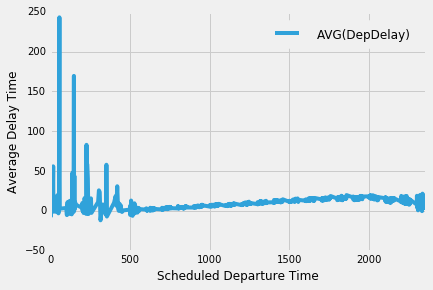

In [10]:

with plt.style.context("fivethirtyeight"):
    avg_delay_by_sched_dep_time.set_index('CRSDepTime').plot.line() #!!!!
    plt.ylabel("Average Delay Time")
    plt.xlabel("Scheduled Departure Time")
    
#Get time of day with the best track record of having the most minimal delay time (Can be negative)
avg_delay_by_sched_dep_time.set_index('CRSDepTime').ix[\
                avg_delay_by_sched_dep_time.set_index('CRSDepTime')['AVG(DepDelay)'] == \
                avg_delay_by_sched_dep_time.set_index('CRSDepTime')['AVG(DepDelay)'].min(), 'AVG(DepDelay)' ]

3:15 (Midnight) is the best time of the day to fly to avoid delays because, on average, planes leave ontime or earlier. I noticed that flights that depart at midnight (00:00 to 05:00) tend to have the worst delay times(highest).

## Question 3 (10 points + 5 points EC)

Make two histograms, one showing the distribution of flight times from San Francisco (SFO) to Chicago (ORD) and the other showing the distribution of flight times (not air time, it doesn't = departure time) in the other direction. Show these two histograms on the same plot and make a legend. What do you notice?

(Note: This data is small enough that you can pull the raw data and call `.hist()` on it. But for an added challenge, try doing the aggregation in SQL and then making a bar graph, like we did in lecture! You can earn 5 points extra credit if you do it this way.)

note: data is small enough to pull.

In [11]:

query3_sfo_to_ord = """

SELECT ActualElapsedTime, COUNT(ActualElapsedTime)
FROM ontime
WHERE Origin = "SFO" and Dest = "ORD"
GROUP BY ActualElapsedTime


"""

sfo_to_ord_flighttimes = pd.read_sql(query3_sfo_to_ord, conn)

query3_ord_to_sfo = """

SELECT ActualElapsedTime, COUNT(ActualElapsedTime)
FROM ontime
WHERE Origin = "ORD" and Dest = "SFO"
GROUP BY ActualElapsedTime


"""

ord_to_sfo_flighttimes = pd.read_sql(query3_ord_to_sfo, conn)


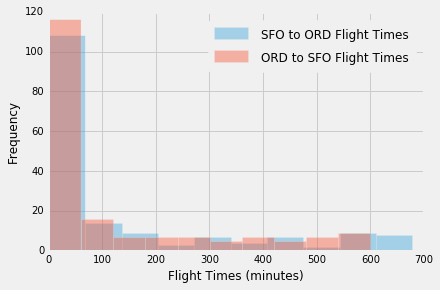

In [12]:
#must call plot.hist() on multiple series to get mult plots on same graphs or can put data in one dataframe
#If you call .plot.hist() on a DataFrame, it will make a new plot with histograms for every column in your DataFrame.
#calling plot.hist() on multiple series will cause plots to go on same graph


with plt.style.context("fivethirtyeight"):
    sfo_to_ord_flighttimes.set_index('ActualElapsedTime')['COUNT(ActualElapsedTime)'].plot.hist(alpha = 0.4)
    ord_to_sfo_flighttimes.set_index('ActualElapsedTime')['COUNT(ActualElapsedTime)'].plot.hist(alpha = 0.4)
    plt.legend(['SFO to ORD Flight Times', 'ORD to SFO Flight Times'])
    plt.xlabel('Flight Times (minutes)')

Flight times (frequency) between San Francisco and Chicago and the other way around does not seem to have any significant variation. It is fortunate knowing that most flight times be

## Question 4 (35 points)

Are older planes more likely to be delayed? Make an appropriate graphic and summarize your conclusions in words. (Note: Your exact analysis might differ from your friend's, but your general conclusion should be the same.)

Hint: The ages of the planes can be determined using the `YearMfr` column in the `planes` table. Each plane is uniquely identified in the `ontime` table by its tail number (`TailNum`). You will need to look up this tail number in the `NNumber` column in `planes`.

In [13]:
# df['B'].str.extract('(\d+)').astype(int) # to extract ints from strings in a dataframe column
#Interpretation: Match int section of tail number and int section of N-Number to get unique identification of airplane.
# on 'N' || = NNumber = TailNum

# all_ontime_data =  pd.read_sql("SELECT * FROM ontime LIMIT 10000" , conn)
# all_planes_data =  pd.read_sql("SELECT * FROM planes LIMIT 10000", conn)
# show_invis_cols_planes = all_planes_data.ix[:, 'City':"OtherName1"]

#print(all_ontime_data['TailNum'])
#all_planes_data

# all_ontime_data['TailNum'] = all_ontime_data['TailNum'].str.extract('(\d+)').fillna(0).astype(int)
# all_planes_data['NNumber'] = all_planes_data['NNumber'].str.extract('(\d+)').fillna(0).astype(int)

query4 = """

SELECT DepDelay, TailNum ,NNumber, Year - YearMfr AS Age
FROM planes
JOIN ontime
ON 'N' || NNumber = TailNum

"""

old_planes_delayed = pd.read_sql(query4, conn)

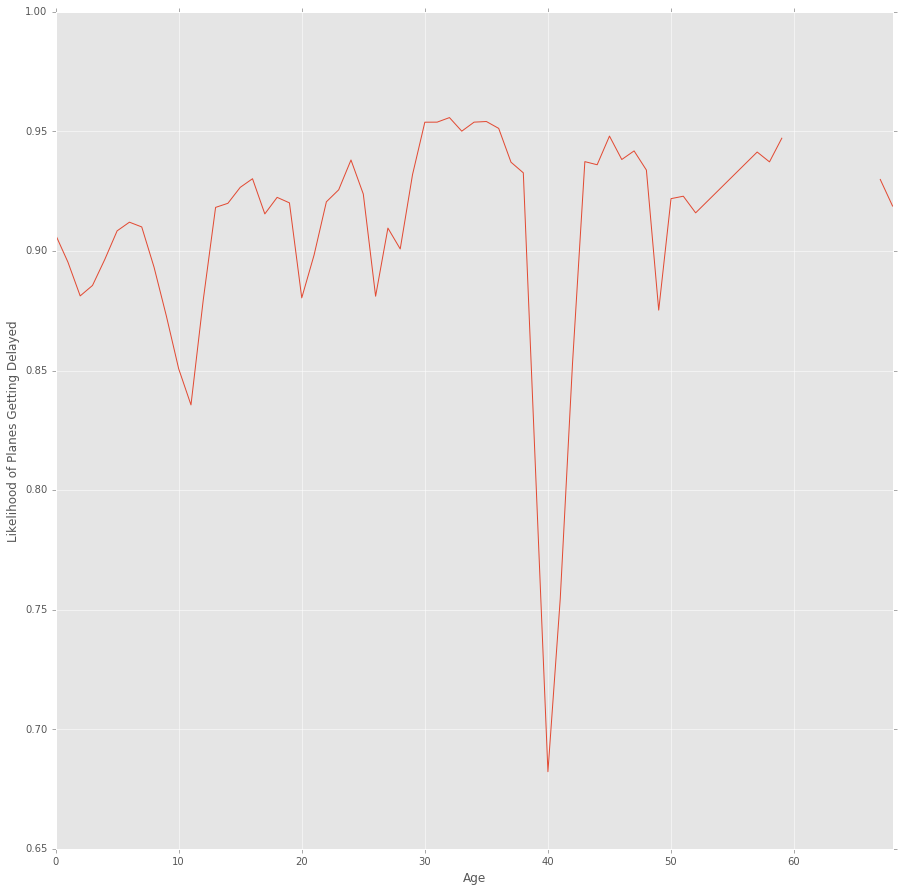

In [14]:
#all_ontime_data.ix[:, 'FlightNum': 'TaxiIn']
#old_planes_delayed.ix[ old_planes_delayed['DepDelay'] > 0 ].groupby('Age')['DepDelay'].count()
old_planes_delayed['DepDelay'] = pd.to_numeric(old_planes_delayed['DepDelay'], errors = 'coerce')

num_DepDelay_by_age = old_planes_delayed.ix[(old_planes_delayed['Age'] >= 0) & (old_planes_delayed['Age'] <= 200)\
            & old_planes_delayed['DepDelay'] > 0 ].groupby('Age')[['DepDelay']].count()
num_DepDelay_by_age.columns = ['Number of Departure Delays']

num_Planes_by_age = old_planes_delayed.ix[(old_planes_delayed['Age'] >= 0) & (old_planes_delayed['Age'] <= 200)].groupby('Age')[['DepDelay']].count()
num_Planes_by_age.columns = ['Number of Planes']

likelihood_of_delays_by_age = num_DepDelay_by_age['Number of Departure Delays'] / num_Planes_by_age['Number of Planes']

with plt.style.context("ggplot"):
    likelihood_of_delays_by_age.plot.line(figsize = (15,15))
    plt.ylabel('Likelihood of Planes Getting Delayed')


In [20]:
#old_planes_delayed
#num_DepDelay_by_age.ix[12:23]
# likelihood_of_delays_by_age

# all_ontime_data =  pd.read_sql("SELECT * FROM ontime LIMIT 10000" , conn)
# all_planes_data =  pd.read_sql("SELECT * FROM planes LIMIT 10000", conn)

#old_planes_delayed

#num_planes

Based on the slowly increasing trend in the graph above, it does seem like that as planes age, they are more likely to get delayed. However, for some reason at around age 40, planes are significantly less likely to get delayed. Less maintenance needed for that generation of airplanes?

## Question 5 (20 points)

Let's think about the impact of missing data on your answer to Question 4. First, answer the following:

- What percentage of planes in the `ontime` table were missing from the `planes` table?
- What percentage of flights in the `ontime` table had planes that were missing from the `planes` table?

(You should think carefully about the difference between these two questions.) Then, answer the following:

- How could this missing data bias your conclusion about the relationship between the age of a plane and flight delays?

In [21]:


num_planes_planestable = num_planes


#get number of unique planes also in ontime
num_planes_also_in_ontime = old_planes_delayed.groupby('TailNum').count().size

percent_of_planes_not_in_ontime = 1- (num_planes_also_in_ontime/num_planes_planestable.ix[0,0])

print("Percentage of planes in ontime table missing from planes table: " + str(percent_of_planes_not_in_ontime))

Percentage of planes in ontime table missing from planes table: 0.962923123997


In [22]:
# of flights != # of planes
#previously from #4, I created ontime table 'version 2'..flights where planes in ontime are also in planes table
#I already created planes in planes table.

#To get percentage of flights in ontime table that had planes that were missing from planes table:

# OVERALL: numplanes not in planes table / total num of flights(which is = to planes in PT + planes not in PT)

# must solve for planes not in PT

#have: num_flights, num_planes_planestable

num_planes_also_in_ontime = len(old_planes_delayed)

num_flights_w_flights_not_in_planestable = num_flights - num_planes_also_in_ontime
#num_planes_also_in_ontime in this case refers to the planes not in planes table
#num_planes_also_in_ontime is also # flights with planes in planes table

percent_of_flights_not_in_planestable = num_flights_w_flights_not_in_planestable/ (num_planes_also_in_ontime\
                    +num_flights_w_flights_not_in_planestable)
percent_of_flights_not_in_planestable


,COUNT(*)
0,0.334893


Having missing data could bias my conclusion about the relationship between the age of plane and flight delays because the missing data destroys the plausibility of being able to see whether or not the numbers of delays will spike up or down at a certain age.

## Submitting this Lab

Now, restart your kernel and re-run your entire notebook from beginning to end. Make sure there are no errors or bugs. When you have verified this, open the Terminal on JupyterHub and type 

`nbgrader submit Lab-04-26 --course dlsun`

to submit this lab.